In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import healpy as hp
import emcee
from scipy import stats
import corner
import glob

import ModelDefinitions as MD
import LogProb as LP
from const import *
from TRIS_vals import *
from multifreq_data import *

import importlib
importlib.reload(LP)
importlib.reload(MD)

from tqdm import tqdm

/home/nitika/.local/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Sigma is 584.819674 arcmin (0.170117 rad) 
-> fwhm is 1377.145090 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Sigma is 584.529302 arcmin (0.170033 rad) 
-> fwhm is 1376.461318 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


/home/nitika/.local/lib/python3.6/site-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


Sigma is 570.972611 arcmin (0.166089 rad) 
-> fwhm is 1344.537750 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/home/nitika/GradSchool/Research/Radio_Background/radio-background/ModelDefinitions.py:54: RuntimeWarning: invalid value encountered in arcsin
  B_halo_below = (np.pi - b - np.arcsin((d_proj/R_eff_below)*np.sin(b)))


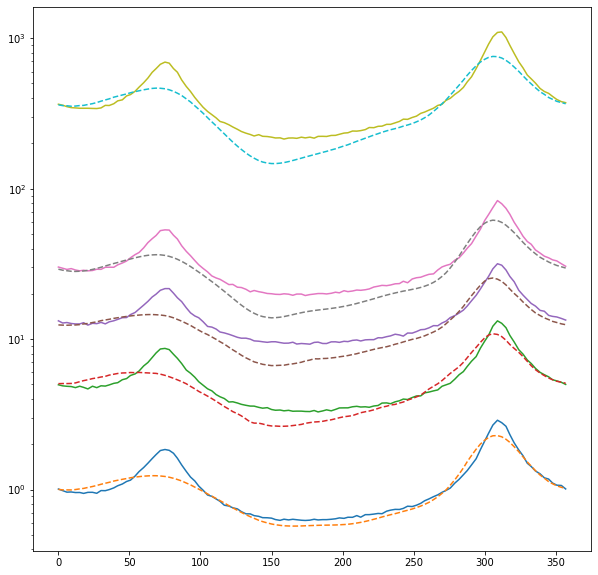

In [2]:
# Show simulated data (simulated data generated in LogProb.py)

plt.figure(figsize=(10,10))
ras = TRIS_ra[0.6e9]
for i in range(len(LP.data_sim)):
    plt.semilogy(ras, LP.data_noisy[i])
    plt.semilogy(ras, data[i], '--')

In [5]:
# Load in data
file = 'multifreq_sim_lstsq.npz'


samples_ = np.load(file)['samples']
# By eye, exclude samples taken in the "burn-in" phase by changing second index
samples = np.array(samples_[:,4000:,:])
print(samples.shape)
ndim=samples.shape[2]

# if necessary, uncomment below 2 lines and exclude anomolous walkers
# idx = np.where((np.array(samples[:,0,0]) < 2.7))
# samples = np.delete(samples, idx, 0)

samples_reshape = samples.reshape((-1, ndim))


(25, 11000, 12)


(25, 11000, 12)


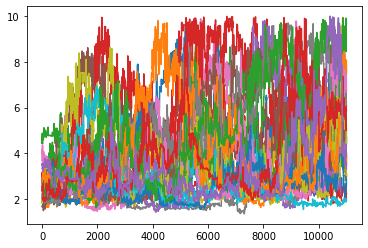

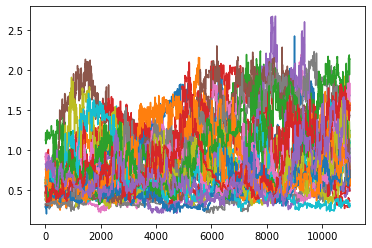

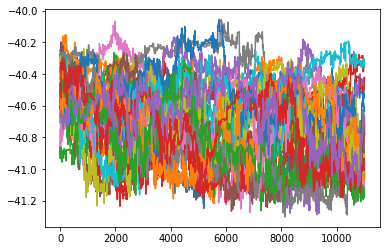

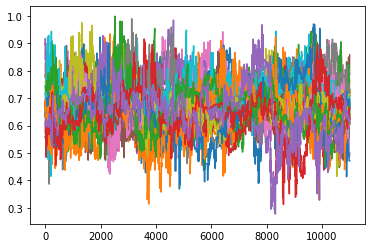

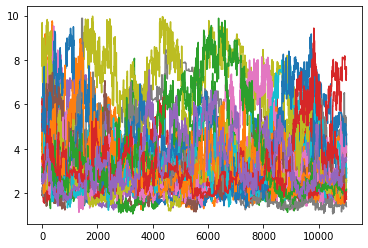

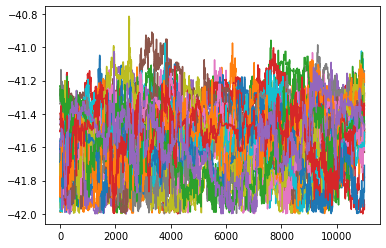

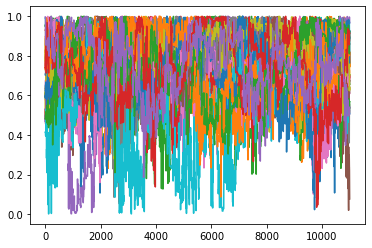

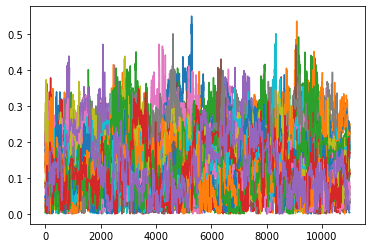

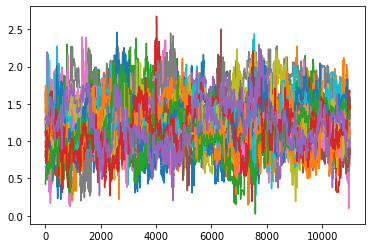

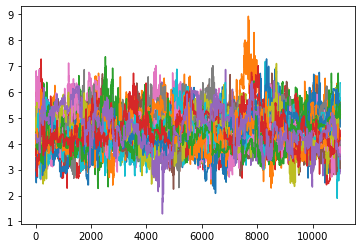

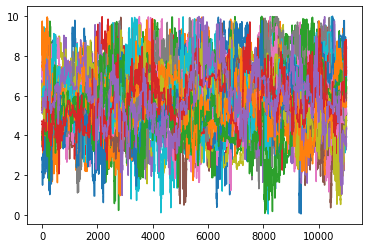

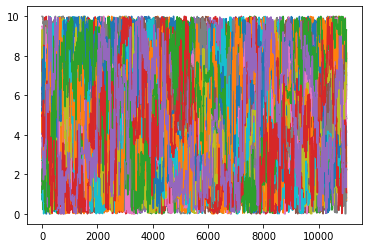

In [6]:
# plot walkers for each parameter individually
print(samples.shape)
for j in range(samples.shape[2]):
    plt.figure()
    for i in range(samples.shape[0]):
        plt.plot(samples[i,:,j])
    
#print(samples.shape)

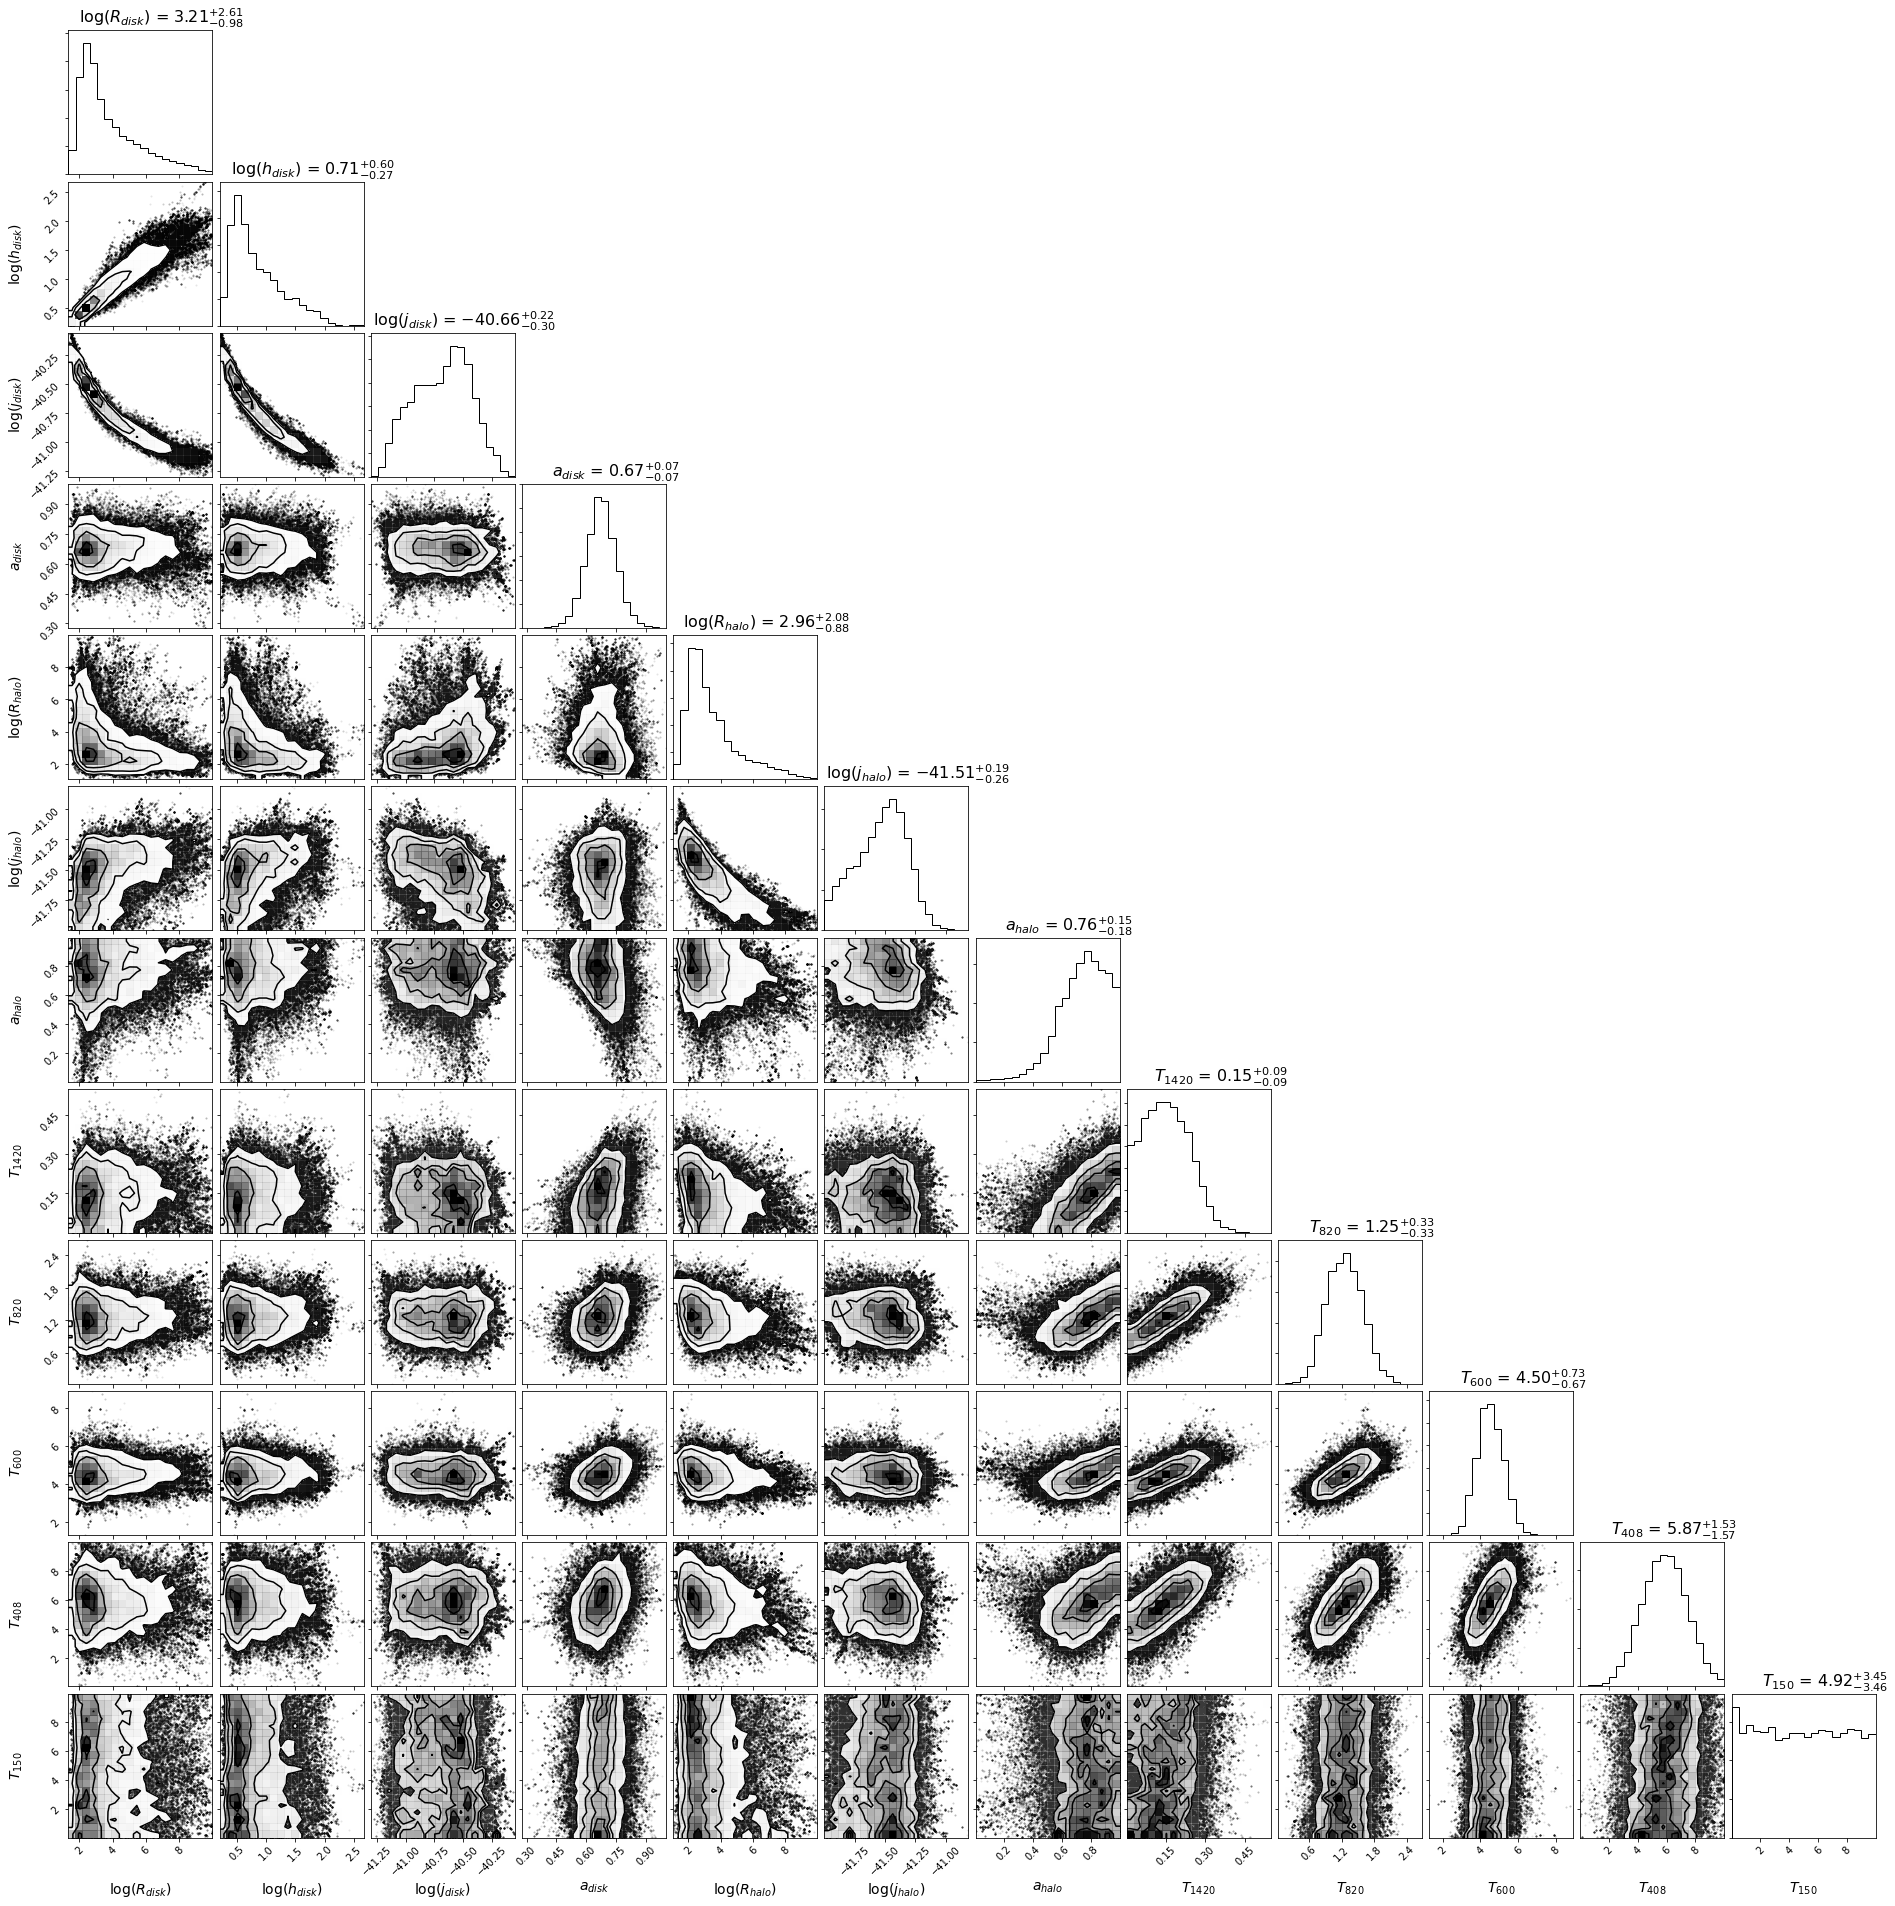

In [7]:
# make corner plot of samples
fig = corner.corner(samples_reshape, 
                     labels=["log($R_{disk}$)","log($h_{disk}$)","log($j_{disk}$)","$a_{disk}$",
                             "log($R_{halo}$)","log($j_{halo}$)","$a_{halo}$", 
                             "$T_{1420}$","$T_{820}$","$T_{600}$","$T_{408}$","$T_{150}$"],
                    label_kwargs={"fontsize": 14}, show_titles=True, title_kwargs={"fontsize": 16, "position":(0.65,1)},
                     #quantiles=[0.16,0.5,0.84]
                   )

In [10]:
# calculate each of the data points for each of the samples and generate basic statistics 

ras = TRIS_ra[0.6e9]
n = len(samples_reshape)

T_1420 = np.zeros((n, len(l)))
T_820 = np.zeros((n, len(l)))
T_600 = np.zeros((n, len(l)))
T_408 = np.zeros((n, len(l)))
T_150 = np.zeros((n, len(l)))

for i in tqdm(range(n)):

    d0 = LP.return_stuff(samples_reshape[i])
    T_1420[i] = d0[0][1]
    T_820[i] = d0[1][1]
    T_600[i] = d0[2][1]
    T_408[i] = d0[3][1]
    T_150[i] = d0[4][1]


  0%|          | 0/200000 [00:00<?, ?it/s]/home/nitika/GradSchool/Research/Radio_Background/radio-background/ModelDefinitions.py:47: RuntimeWarning: invalid value encountered in arcsin
  B_halo1 = np.pi - l - np.arcsin((d/R_halo)*np.sin(l))
/home/nitika/GradSchool/Research/Radio_Background/radio-background/ModelDefinitions.py:54: RuntimeWarning: invalid value encountered in arcsin
  B_halo_below = (np.pi - b - np.arcsin((d_proj/R_eff_below)*np.sin(b)))
100%|██████████| 200000/200000 [52:00<00:00, 64.10it/s] 


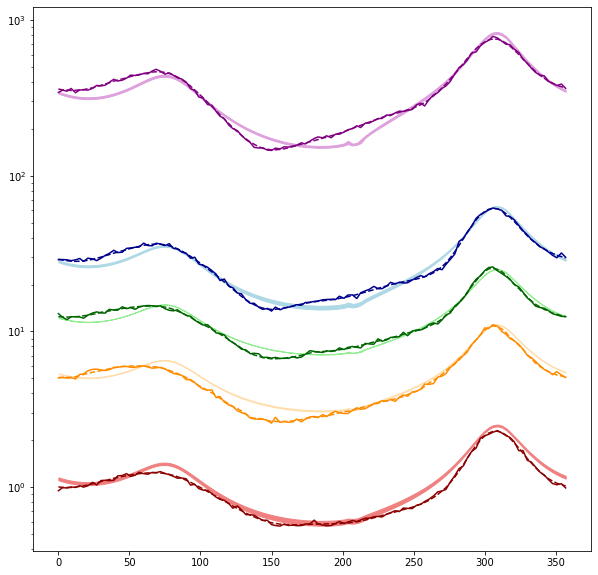

In [12]:
# plot data and mean model with one sigma error bars

mean_1420 = np.mean(T_1420, axis=0)
std_1420 = np.std(T_1420, axis=0)

mean_820 = np.mean(T_820, axis=0)
std_820 = np.std(T_820, axis=0)

mean_600 = np.mean(T_600, axis=0)
std_600 = np.std(T_600, axis=0)

mean_408 = np.mean(T_408, axis=0)
std_408 = np.std(T_408, axis=0)

mean_150 = np.mean(T_150, axis=0)
std_150 = np.std(T_150, axis=0)


    
# data - can plot both with and without noise 
plt.figure(figsize=(10,10))
plt.semilogy(ras,LP.data_noisy[0],label='1420', color='darkred')
plt.semilogy(ras,LP.data_noisy[1],label='820', color='darkorange')
plt.semilogy(ras,LP.data_noisy[2],label='600', color='darkgreen')
plt.semilogy(ras,LP.data_noisy[3],label='408', color='darkblue')
plt.semilogy(ras,LP.data_noisy[4],label='150', color='purple')

plt.semilogy(ras,LP.data_sim[0],label='1420', linestyle='--', color='darkred')
plt.semilogy(ras,LP.data_sim[1],label='820', linestyle='--', color='darkorange')
plt.semilogy(ras,LP.data_sim[2],label='600', linestyle='--', color='darkgreen')
plt.semilogy(ras,LP.data_sim[3],label='408', linestyle='--', color='darkblue')
plt.semilogy(ras,LP.data_sim[4],label='150', linestyle='--', color='purple')

# # mean model
# plt.semilogy(ras,mean_1420,'--', color='lightcoral')
# plt.semilogy(ras,mean_820,'--', color='navajowhite')
# plt.semilogy(ras,mean_600,'--', color='lightgreen')
# plt.semilogy(ras,mean_408,'--', color='lightblue')
# plt.semilogy(ras,mean_150,'--', color='plum')

# error bars
plt.fill_between(ras, mean_1420+std_1420, mean_1420-std_1420, color='lightcoral')
plt.fill_between(ras, mean_820+std_820, mean_820-std_820, color='navajowhite')
plt.fill_between(ras, mean_600+std_600, mean_600-std_600, color='lightgreen')
plt.fill_between(ras, mean_408+std_408, mean_408-std_408, color='lightblue')
plt.fill_between(ras, mean_150+std_150, mean_150-std_150, color='plum')

